# Statistical Analysis of the Top 100m Extended Time Series
*Akira Di Sandro, 7/29/20*
<br> In this notebook I will be running statistical analyses of the top 100m extended time series. More specifically, I will be looking at the mean and standard deviation of both the model data (over the extended time period of 1984-2014) and the observational data for the observational period. I will also look at the power spectra of the model data to see where there are peaks to look at any patterns in the data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
times = np.array([])
times1 = np.array([])
model_trans = np.array([])
obs_trans = np.array([])
count = 0
with open('../Data Files/mtrans0-100.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    
    for row in reader:
        times = np.append(times,row[0])
        times1 = np.append(times1,row[1])
        model_trans = np.append(model_trans,row[2])
        
        if count>339:
            obs_trans = np.append(obs_trans,row[3])
        
        count+=1

In [4]:
times = np.asarray(times[1:], dtype=np.int, order='C')
model_trans = np.asarray(model_trans[1:], dtype=np.float64, order='C')
obs_trans = np.asarray(obs_trans, dtype=np.float64, order='C')

## Calculating Mean and Standard Deviation

In [5]:
modelmean100 = model_trans.mean()
modelstd100 = model_trans.std()
obsmean100 = obs_trans.mean()
obsstd100 = obs_trans.std()

In [6]:
modelmean100, modelstd100,obsmean100,obsstd100

(-2.572200119039642,
 3.040906891617631,
 -1.6768167905732478,
 1.4902442704325372)

In [7]:
mod_range = (modelmean100-modelstd100, modelmean100+modelstd100)
obs_range = (obsmean100-obsstd100, obsmean100+obsstd100)

boo = mod_range[0] < obsmean100 < mod_range[1]

print(mod_range, '\n', obs_range, '\n', boo)

(-5.613107010657274, 0.46870677257798876) 
 (-3.1670610610057848, -0.18657252014071068) 
 True


In [8]:
std2 = (modelmean100-2*modelstd100, modelmean100+2*modelstd100)
boo2 = std2[0] < obsmean100 < std2[1]
print(std2, '\n', boo2)

(-8.654013902274905, 3.5096136641956197) 
 True


## Calculating the Power Spectrum

In [9]:
from scipy import signal

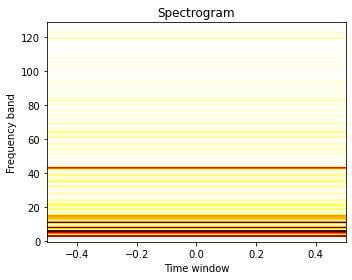

In [10]:
freqs, times, spectrogram = signal.spectrogram(model_trans)
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

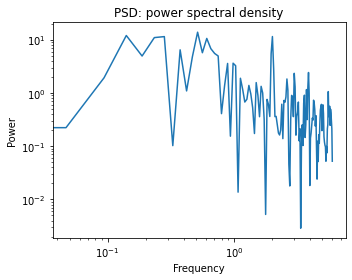

In [11]:
freqs, psd = signal.welch(model_trans, fs=12)

plt.figure(figsize=(5, 4))
plt.loglog(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

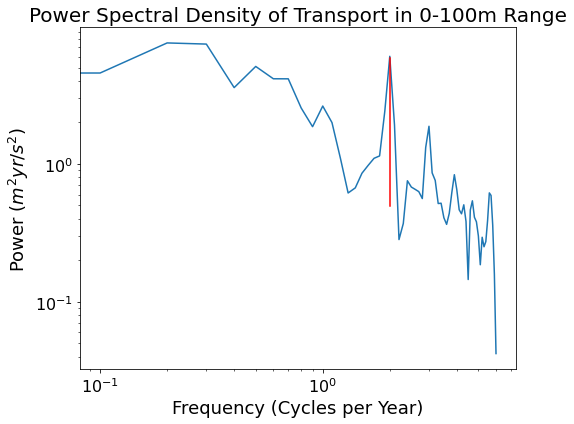

In [14]:
freqs, psd = signal.welch(model_trans, fs=12, nperseg=120)

nu = 2 * (model_trans.shape[0]/120)

from scipy.stats.distributions import chi2

err_low = nu/chi2.ppf(.05/2, df=nu)
err_high =  nu/chi2.ppf(1-.05/2, df=nu)

plt.figure(figsize=(8, 6))
plt.loglog(freqs, psd)
plt.loglog([freqs[20],freqs[20]],[1.2*err_low,1.2*err_high], 'r')
plt.title('Power Spectral Density of Transport in 0-100m Range', fontsize=20)
plt.xlabel('Frequency (Cycles per Year)', fontsize=18)
plt.ylabel('Power (${m^{2}yr}/s^{2}$)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('psd100.png')